# sentiment analysis tool 
Welcome to the sentiment analysis tool , which will help you too understand the mood of the feedback 

In [2]:
#importing necessary libraries
import sys
import numpy 
import indicoio
indicoio.config.api_key = 'enter your indicoio API here' #API key of indicoio library
import pandas as pd #pandas library for operating with dataframes etc.
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading data from the excel file. Please check , if your file named as 'source.xlsx' and uploaded to anaconda tool
data1 = pd.read_excel('source.xlsx')#download the excel file with feedbacks 
target = data1['feedback']#setting target column with feedbacks
clear_target = target.dropna()#dropping the empty rows 
result = []#list for result values
for words in clear_target:#cycle for sentiment analysis
    a=indicoio.emotion(words)#applying function to each row
    result.append(a)#adding results to the list 

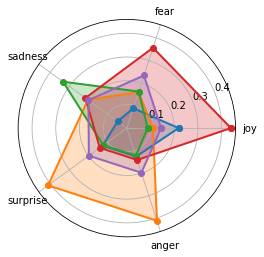

In [4]:
#converting df to csv
dfr1 =  pd.DataFrame(result)
excs1=dfr1.to_csv('out_file.csv', sep=',',  index=None)
#drawing radarplot
import seaborn as sns
radar2 = pd.read_csv('out_file.csv')
labels1=numpy.array(['joy', 'fear', 'sadness', 'surprise', 'anger'])
stats1=radar2.loc[0::,labels1].values
angles1=numpy.linspace(0, 2*numpy.pi, len(radar2), endpoint=False)
angles2=numpy.linspace(0, 2*numpy.pi, len(labels1), endpoint=False)

# close the plot
stats1=numpy.concatenate((stats1,[stats1[0]]))
angles1=numpy.concatenate((angles1,[angles1[0]]))
#figure
fig1=plt.figure()
ax1 = fig1.add_subplot(111, polar=True)
ax1.plot(angles1, stats1, 'o-', linewidth=2)
ax1.fill(angles1, stats1, alpha=0.25)
ax1.set_thetagrids(angles2 * 180/numpy.pi, labels1)

ax1.grid(True)

# getting mean/quantile values of dataframe
For getting more clear vision of data, you may need to know the mean, or quantile values of dataset, example is shown below. 

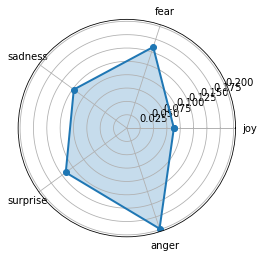

In [5]:
dfr_test =  pd.DataFrame(result)
#finding the quantile(1st-quantile=0.25/2nd-quantile=0.5/3rd-quantile=0.75). To find the mean value , just use .mean() parameter. For example a1 = dfr_test['anger'].mean()
a1=dfr_test['anger'].quantile(q=0.25)
a2=dfr_test['fear'].quantile(q=0.25)
a3=dfr_test['joy'].quantile(q=0.25)
a4=dfr_test['sadness'].quantile(q=0.25)
a5=dfr_test['surprise'].quantile(q=0.25)
dft = pd.DataFrame(columns=['anger','fear','joy','sadness','surprise'])
dft.loc[0] = pd.Series({'anger':a1, 'fear':a2, 'joy':a3, 'sadness':a4, 'surprise':a5})
excs1=dft.to_csv('out_file1.csv', sep=',',  index=None)
labels=numpy.array(['joy', 'fear', 'sadness', 'surprise', 'anger'])
stats=dft.loc[0,labels].values
angles=numpy.linspace(0, 2*numpy.pi, len(labels), endpoint=False)
# close the plot
stats=numpy.concatenate((stats,[stats[0]]))
angles=numpy.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/numpy.pi, labels)

ax.grid(True)